# This is my capstone project for the Udacity Machine Learning Nanodegree.

# Import the libraries needed.

In [1]:
import pandas as pd
import numpy as np
import keras as kr
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from os import listdir

Using TensorFlow backend.


# Get the data.

# Since we already know the name of the specific stock we are trying to get from the name of the file, we can drop that column in the dataframe.

In [2]:
directory = 'sandp500/individual_stocks_5yr'
#directory = 'Capstone/sandp500/individual_stocks_5yr'
dir_listing = listdir(directory)

In [3]:
symbols_list = []

for symbol in dir_listing:
    symb = symbol.split('_')[0]
    symbols_list.append(symb)
    
csv_file = '{}/{}_data.csv'.format(directory, symbols_list[0])
dataset = pd.read_csv(csv_file)

## Transform Data for suitable LSTM analysis

In [4]:
dataset = dataset.assign(trading_date = pd.to_datetime(dataset['Date']))

In [5]:
dataset = dataset.drop('Name', 1)
dataset = dataset.drop('Date', 1)
dataset.set_index(['trading_date'], inplace=True)

In [6]:
dataset['NextDayClose'] = dataset['Close'].shift(-1)

In [7]:
dataset.head(10)

,Open,High,Low,Close,Volume,NextDayClose
trading_date,,,,,,
2013-12-09,23.85,25.44,23.45,24.60,43197268,24.88
2013-12-10,24.50,25.17,24.41,24.88,18660625,25.99
2013-12-11,25.48,27.20,25.37,25.99,38843371,25.45
2013-12-12,26.20,26.71,25.45,25.45,19981824,26.23
2013-12-13,25.75,26.30,25.52,26.23,12192421,26.61
2013-12-16,26.63,26.77,26.35,26.61,13190945,26.10
2013-12-17,26.48,26.59,25.95,26.10,11413199,26.23
2013-12-18,25.99,26.23,25.55,26.23,9994162,26.12
2013-12-19,26.12,26.49,25.82,26.12,6916497,26.33


In [8]:
#below is the Daily Returns calculation to put into the Sharpe Ratio. 
#df = dataset.assign(Daily_Returns = np.divide((dataset.Open - dataset.Close), dataset.Close) * 100)

#Below is the calculation for the Sharpe Ratio column. 
#df = df.assign(Sharpe_Ratio = np.divide((df.Daily_Returns - 0.046), np.std(np.array([df.Open, df.High, df.Low, df.Close]))))

#Below is the rate of change (momentum) for the specific stock. 
#df = df.assign(Rate_of_Change = (np.divide(df.Close, df.Open) - 1) * 100)

df = dataset.assign(Difference_of_Close = dataset['Close'].diff())


In [9]:
df.head(10)

,Open,High,Low,Close,Volume,NextDayClose,Difference_of_Close
trading_date,,,,,,,
2013-12-09,23.85,25.44,23.45,24.60,43197268,24.88,NaN
2013-12-10,24.50,25.17,24.41,24.88,18660625,25.99,0.28
2013-12-11,25.48,27.20,25.37,25.99,38843371,25.45,1.11
2013-12-12,26.20,26.71,25.45,25.45,19981824,26.23,-0.54
2013-12-13,25.75,26.30,25.52,26.23,12192421,26.61,0.78
2013-12-16,26.63,26.77,26.35,26.61,13190945,26.10,0.38
2013-12-17,26.48,26.59,25.95,26.10,11413199,26.23,-0.51
2013-12-18,25.99,26.23,25.55,26.23,9994162,26.12,0.13
2013-12-19,26.12,26.49,25.82,26.12,6916497,26.33,-0.11


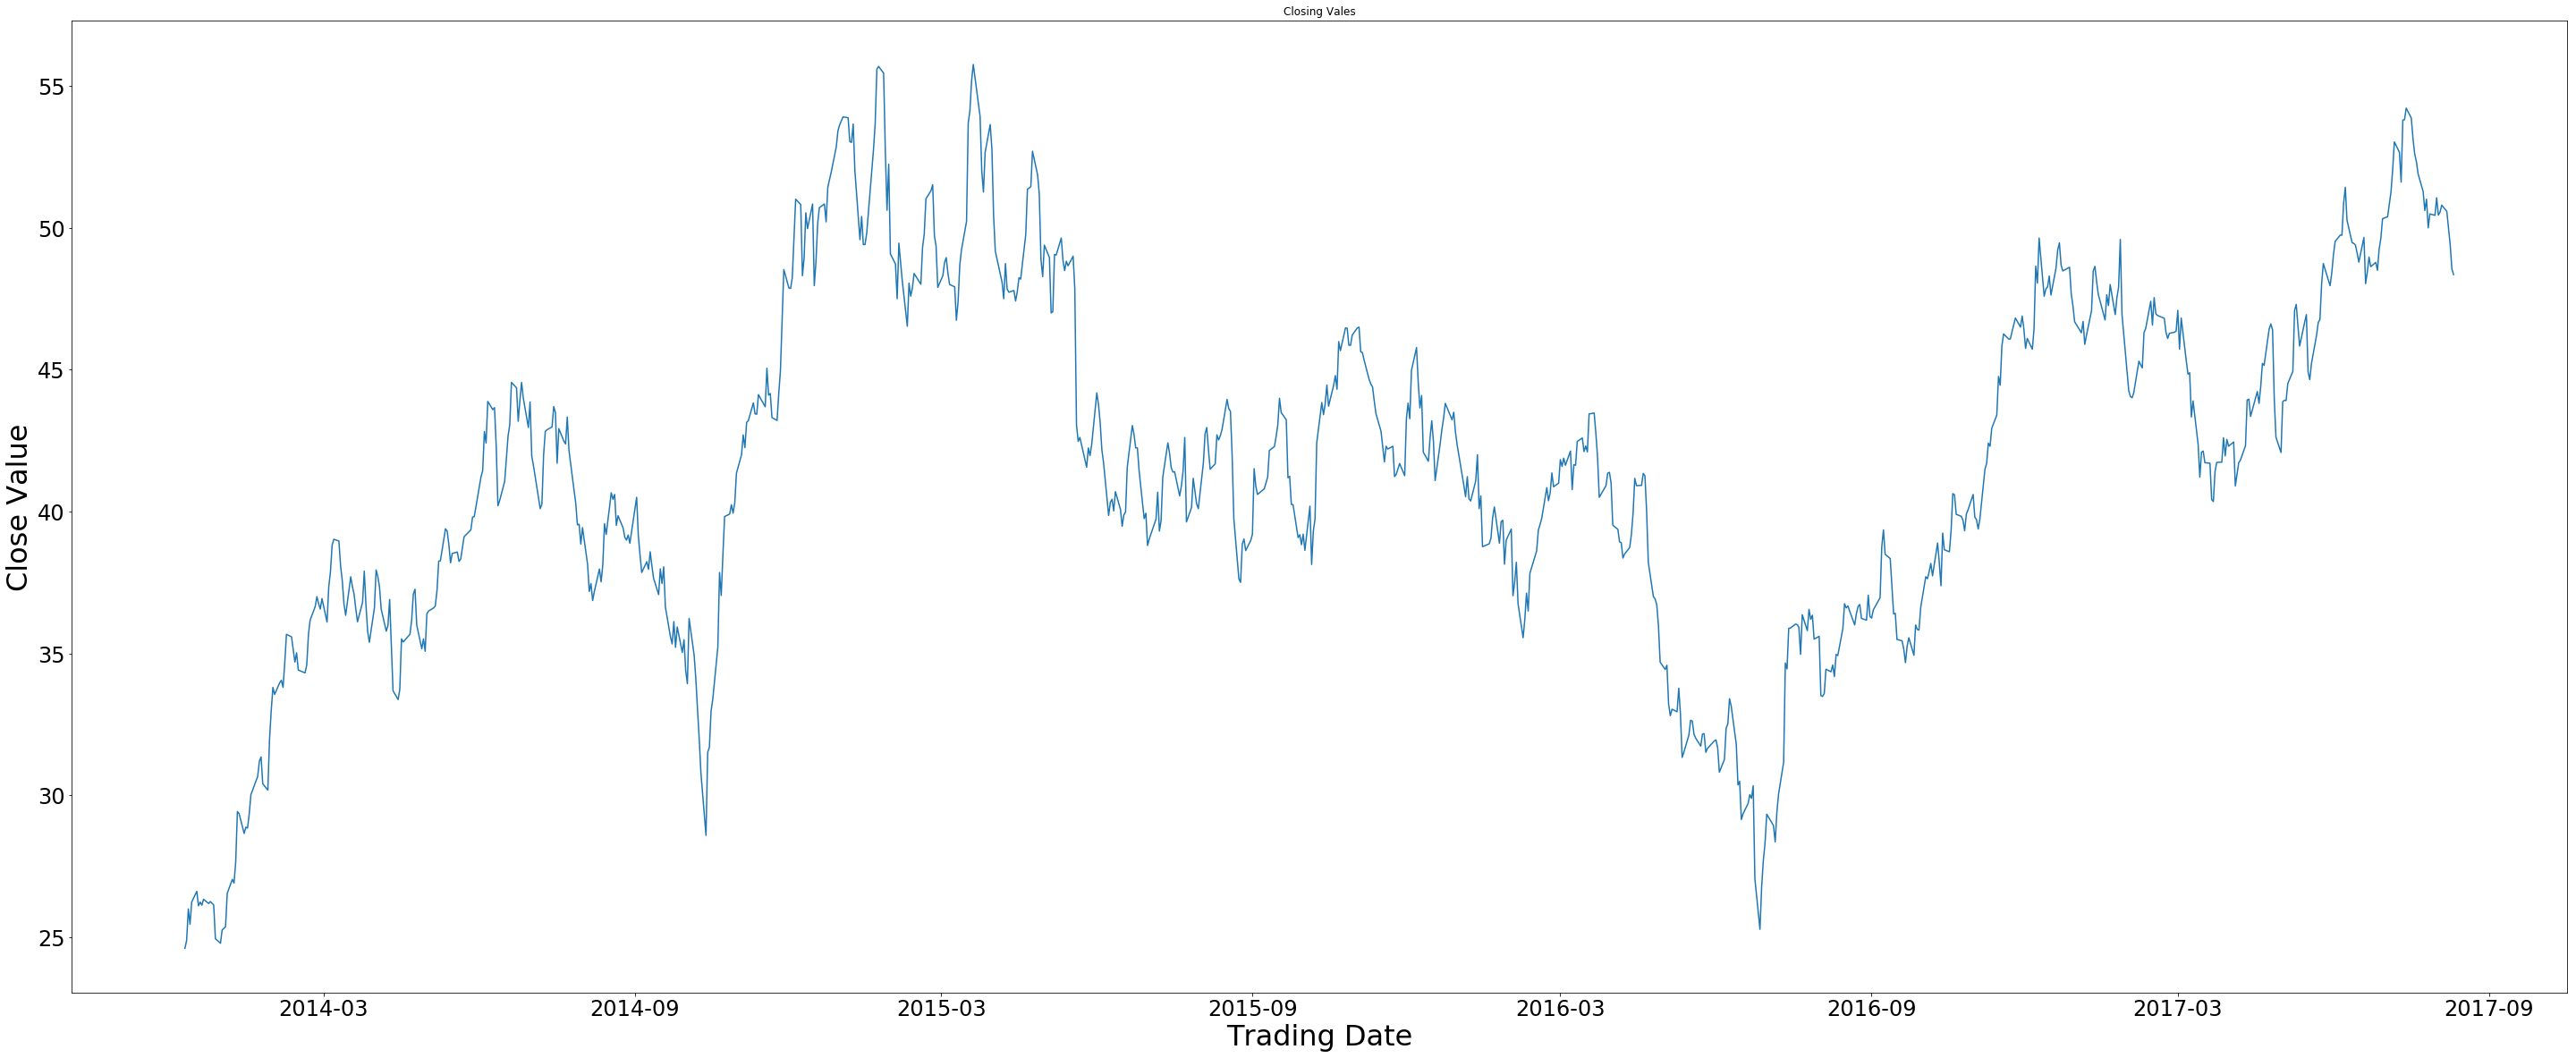

In [12]:
x = df.index.values
y = df['Close'].values

plt.figure(figsize=(50, 20))
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)

plt.plot(x, y, label="Close Values")

plt.xlabel('Trading Date', fontsize=32)
plt.ylabel('Close Value', fontsize=32)

plt.title("Closing Vales")


plt.show()

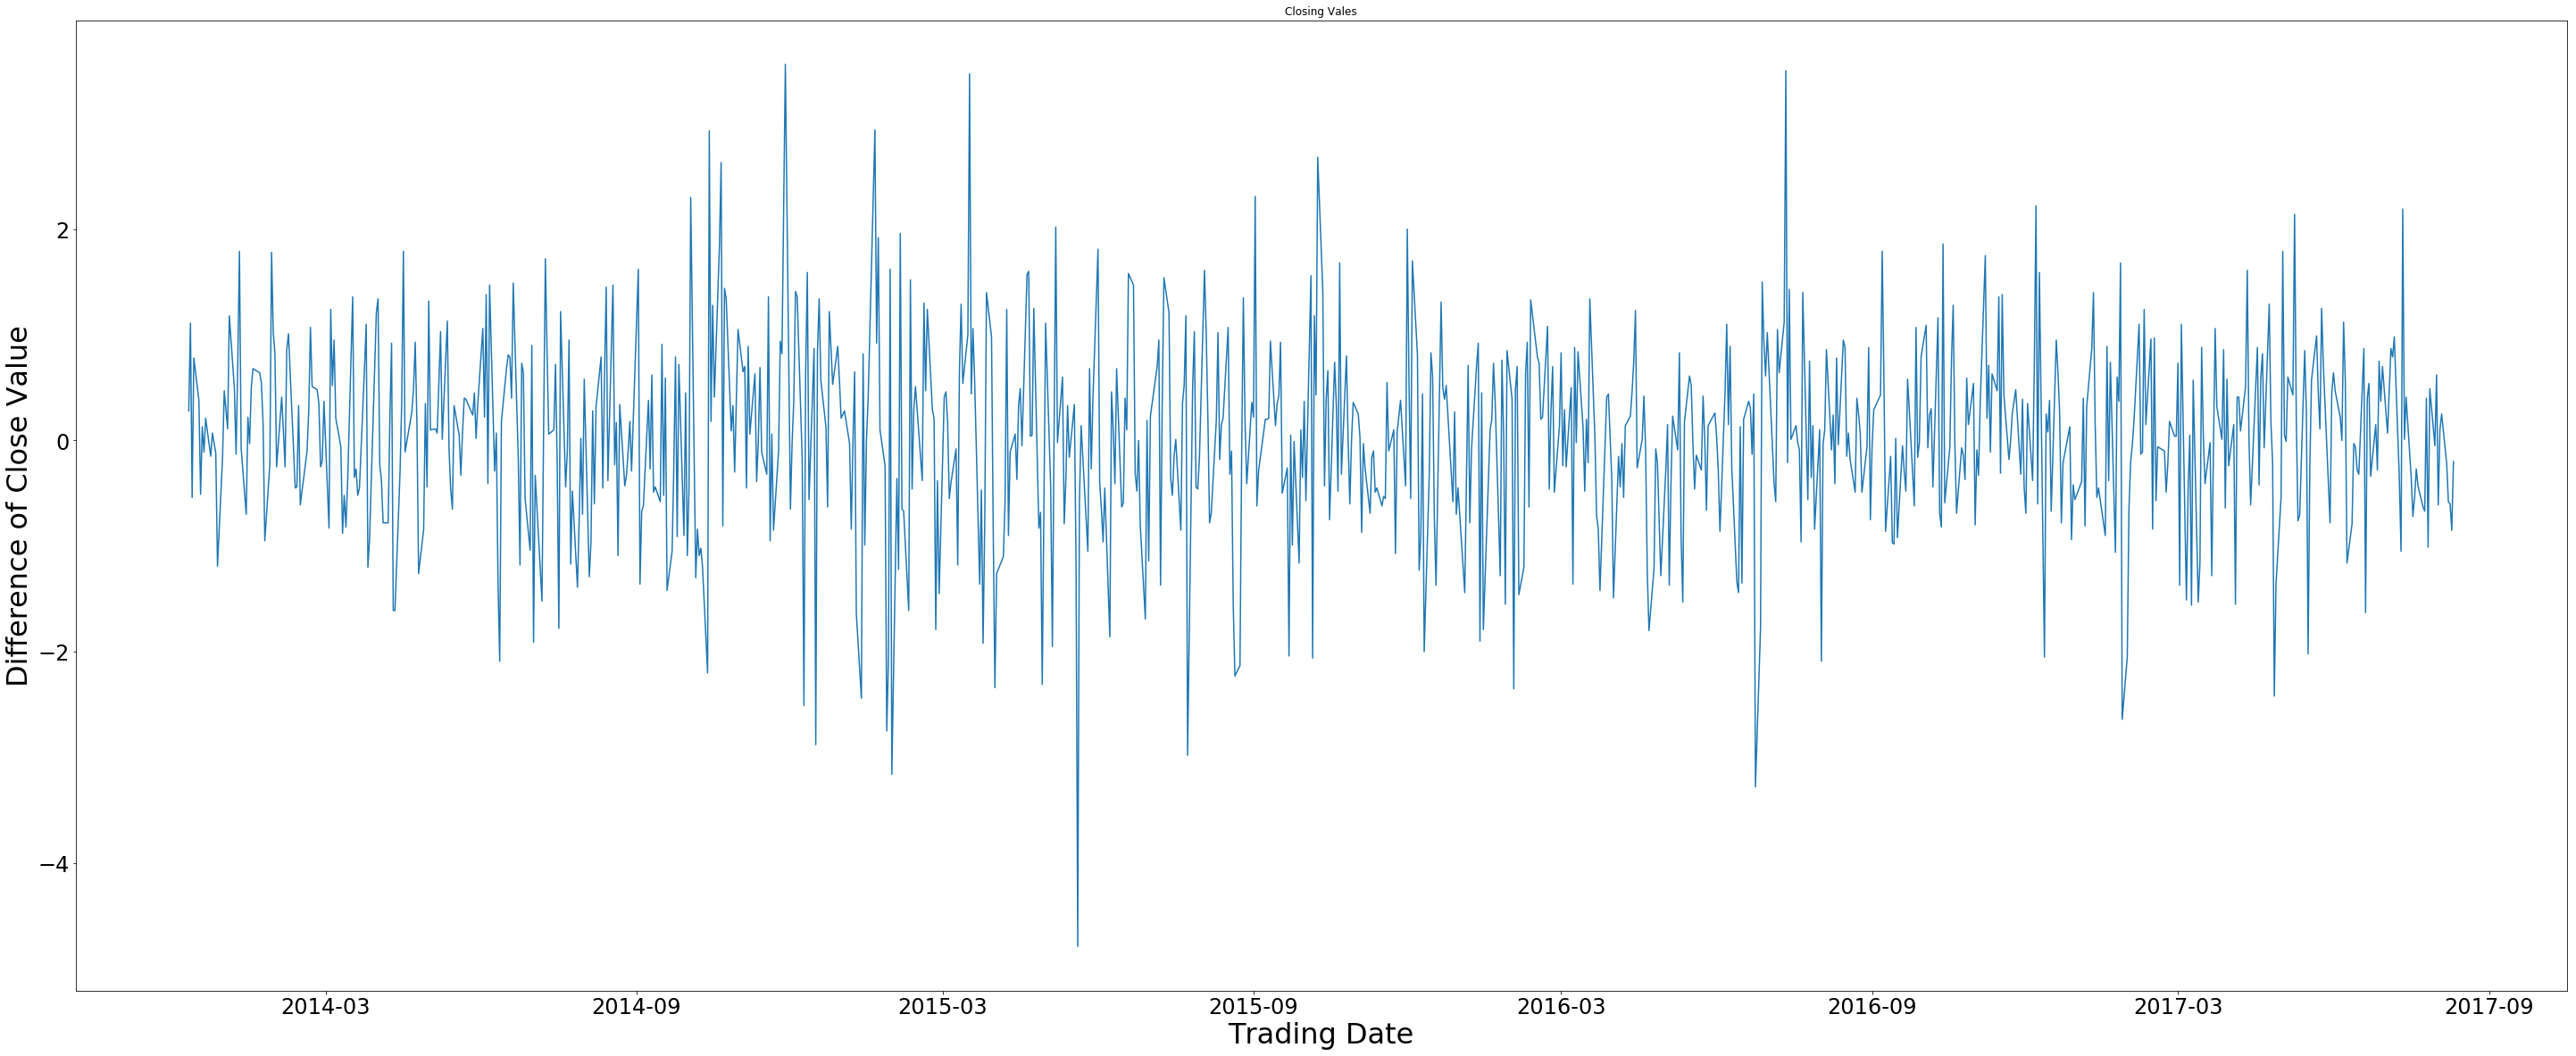

In [11]:
e = df.index.values
f = df['Difference_of_Close'].values

plt.figure(figsize=(50, 20))
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)

plt.plot(e, f, label="Difference of Close Values")

plt.xlabel('Trading Date', fontsize=32)
plt.ylabel('Difference of Close Value', fontsize=32)

plt.title("Closing Vales")


plt.show()